# 🎯 Overfitting and Underfitting Demonstration

## **Neural Networks Learning to Approximate the Sine Function**

### **Main Goal:**
Learn to identify, understand, and prevent overfitting and underfitting in neural networks by training models to approximate the mathematical function y = sin(x).

### **Key Learning Objectives:**
- **Understand Model Complexity**: Learn how model complexity affects learning capacity
- **Identify Overfitting**: Recognize when models memorize training data but fail to generalize
- **Identify Underfitting**: Recognize when models are too simple to capture underlying patterns
- **Regularization Techniques**: Apply dropout, L1/L2 regularization, early stopping, and batch normalization
- **Performance Evaluation**: Use validation curves and visualization to assess model quality

### **Why the Sine Function?**
The sine function is perfect for this demonstration because:
- **Known Ground Truth**: We know the exact mathematical relationship
- **Non-Linear**: Requires neural networks to learn complex patterns
- **Smooth Function**: Easy to visualize and understand deviations
- **Controllable Noise**: We can add controlled amounts of noise to simulate real-world data

### **Interactive Features:**
🎮 Model complexity explorer | 📊 Real-time training visualization | ⚡ Regularization parameter tuning | 🔬 Performance comparison dashboard

---

## 1. Import Required Libraries

We'll use PyTorch for neural networks, NumPy for data manipulation, and Matplotlib for visualization.

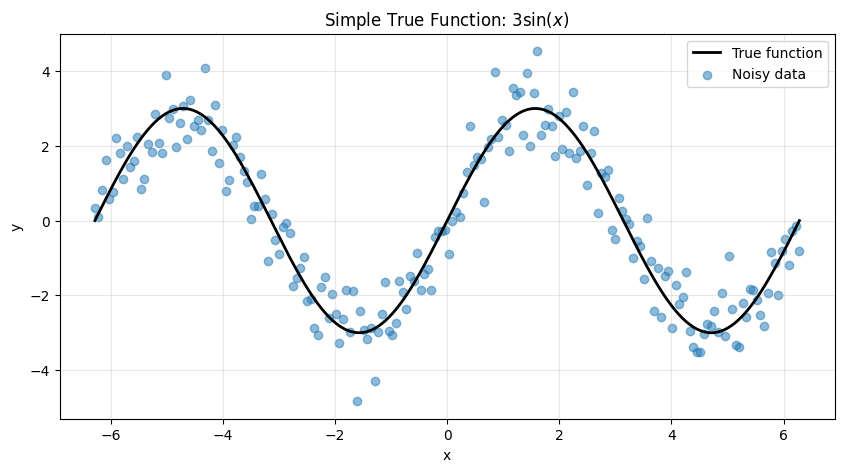

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
X = np.linspace(-2 * np.pi, 2 * np.pi, 200)
# Updated true function
y_true = 3 * np.sin(X)
noise = np.random.normal(0, 0.7, size=X.shape)
y = y_true + noise

plt.figure(figsize=(10, 5))
plt.plot(X, y_true, label='True function', color='black', linewidth=2)
plt.scatter(X, y, label='Noisy data', alpha=0.5)
plt.title('Simple True Function: $3 \sin(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2. Generate Synthetic Dataset

Let's create a dataset based on the sine function with controllable noise levels. This will allow us to demonstrate how different amounts of training data and noise affect overfitting and underfitting.

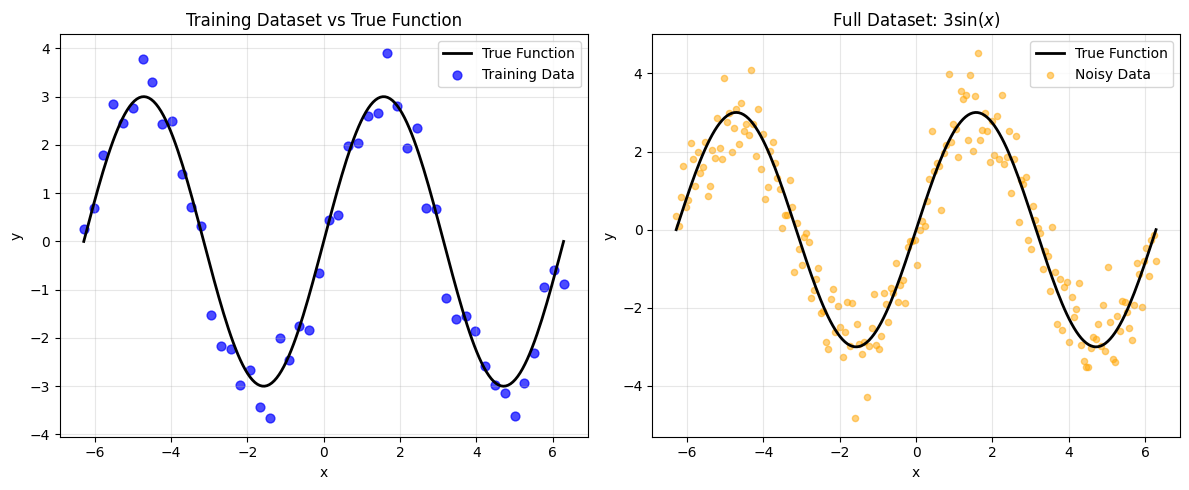

🎯 DATASET CHARACTERISTICS:
• Training samples: 50
• Full dataset: 200
• Function: 3*sin(x)
• Noise level: σ = 0.5-0.7
• Challenge: Learn simple sine function


In [3]:
# Create a comprehensive dataset for training and testing
np.random.seed(42)

# Generate training data (smaller sample)
X_sample = np.linspace(-2*np.pi, 2*np.pi, 50).reshape(-1, 1)
y_true_sample = 3 * np.sin(X_sample.flatten())
noise_sample = np.random.normal(0, 0.5, size=y_true_sample.shape)
y_sample = y_true_sample + noise_sample

# Generate dense test data for smooth visualization
X_dense = np.linspace(-2*np.pi, 2*np.pi, 200).reshape(-1, 1)
y_true_dense = 3 * np.sin(X_dense.flatten())

# Visualize the dataset
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.plot(X_dense, y_true_dense, 'k-', linewidth=2, label='True Function')
plt.scatter(X_sample, y_sample, alpha=0.7, s=40, color='blue', label='Training Data')
plt.title('Training Dataset vs True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(X, y_true, 'k-', linewidth=2, label='True Function')
plt.scatter(X, y, alpha=0.5, s=20, color='orange', label='Noisy Data')
plt.title('Full Dataset: $3\\sin(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎯 DATASET CHARACTERISTICS:")
print(f"• Training samples: {len(X_sample)}")
print(f"• Full dataset: {len(X)}")
print(f"• Function: 3*sin(x)")
print(f"• Noise level: σ = 0.5-0.7")
print("• Challenge: Learn simple sine function")

## 3. Create Neural Network Models

Let's define neural network architectures with different complexities to demonstrate underfitting, good fit, and overfitting scenarios.

Training overfitting neural network...
Epoch 200, Loss: 0.060511
Epoch 200, Loss: 0.060511
Epoch 400, Loss: 0.012659
Epoch 400, Loss: 0.012659
Epoch 600, Loss: 0.012788
Epoch 600, Loss: 0.012788
Epoch 800, Loss: 0.016665
Epoch 800, Loss: 0.016665
Epoch 1000, Loss: 0.002416
✅ Overfitting neural network trained!
📊 BASELINE MODEL COMPARISON:
Linear Model (Underfitting):
  MSE: 3.8105
  RMSE: 1.9521
  MAE: 1.6900
  R²: 0.1490

Neural Network (Overfitting):
  MSE: 0.0576
  RMSE: 0.2399
  MAE: 0.1832
  R²: 0.9871
Epoch 1000, Loss: 0.002416
✅ Overfitting neural network trained!
📊 BASELINE MODEL COMPARISON:
Linear Model (Underfitting):
  MSE: 3.8105
  RMSE: 1.9521
  MAE: 1.6900
  R²: 0.1490

Neural Network (Overfitting):
  MSE: 0.0576
  RMSE: 0.2399
  MAE: 0.1832
  R²: 0.9871


Training overfitting neural network...
Epoch 200, Loss: 0.060511
Epoch 200, Loss: 0.060511
Epoch 400, Loss: 0.012659
Epoch 400, Loss: 0.012659
Epoch 600, Loss: 0.012788
Epoch 600, Loss: 0.012788
Epoch 800, Loss: 0.016665
Epoch 800, Loss: 0.016665
Epoch 1000, Loss: 0.002416
✅ Overfitting neural network trained!
📊 BASELINE MODEL COMPARISON:
Linear Model (Underfitting):
  MSE: 3.8105
  RMSE: 1.9521
  MAE: 1.6900
  R²: 0.1490

Neural Network (Overfitting):
  MSE: 0.0576
  RMSE: 0.2399
  MAE: 0.1832
  R²: 0.9871
Epoch 1000, Loss: 0.002416
✅ Overfitting neural network trained!
📊 BASELINE MODEL COMPARISON:
Linear Model (Underfitting):
  MSE: 3.8105
  RMSE: 1.9521
  MAE: 1.6900
  R²: 0.1490

Neural Network (Overfitting):
  MSE: 0.0576
  RMSE: 0.2399
  MAE: 0.1832
  R²: 0.9871


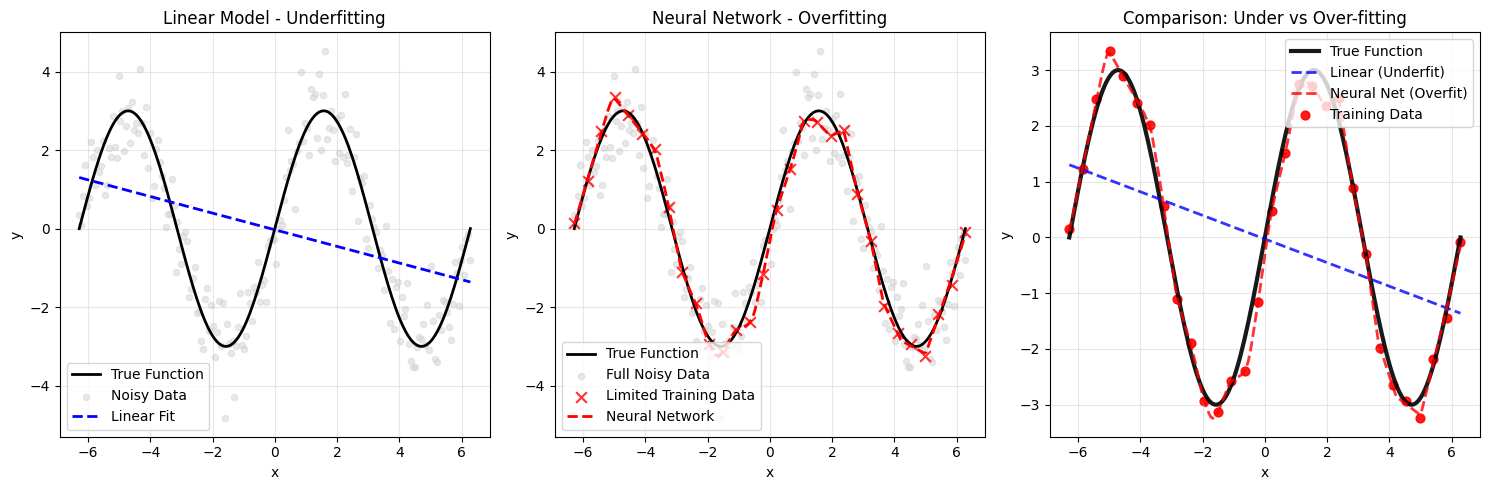

In [4]:
# Define evaluation metrics for model performance
def calculate_metrics(y_true, y_pred):
    """Calculate various performance metrics"""
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    
    # R-squared (coefficient of determination)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    return {
        'MSE': mse,
        'RMSE': rmse, 
        'MAE': mae,
        'R²': r2
    }

# Example: Simple baseline predictions
# Linear baseline (underfitting example)
linear_coeffs = np.polyfit(X.flatten(), y, 1)  # Fit linear model
y_pred_linear = np.polyval(linear_coeffs, X)

# Neural Network (overfitting example) - Train a very complex NN on limited data
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class OverfittingNet(nn.Module):
    """Very complex network designed to overfit with limited data"""
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Train overfitting network on limited data (only 30 points)
np.random.seed(42)
X_limited = np.linspace(-2*np.pi, 2*np.pi, 30).reshape(-1, 1)  # Very limited data
y_true_limited = 3 * np.sin(X_limited.flatten())
noise_limited = np.random.normal(0, 0.3, size=y_true_limited.shape)
y_limited = y_true_limited + noise_limited

# Convert to tensors
X_limited_tensor = torch.FloatTensor(X_limited).to(device)
y_limited_tensor = torch.FloatTensor(y_limited.reshape(-1, 1)).to(device)
X_tensor = torch.FloatTensor(X.reshape(-1, 1)).to(device)

# Train the overfitting network
overfitting_model = OverfittingNet().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(overfitting_model.parameters(), lr=0.001)

print("Training overfitting neural network...")
for epoch in range(1000):  # Train for many epochs to ensure overfitting
    optimizer.zero_grad()
    pred = overfitting_model(X_limited_tensor)
    loss = criterion(pred, y_limited_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 200 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")

# Get predictions on full range
overfitting_model.eval()
with torch.no_grad():
    y_pred_nn = overfitting_model(X_tensor).cpu().numpy().flatten()

print("✅ Overfitting neural network trained!")

# Calculate metrics
linear_metrics = calculate_metrics(y_true, y_pred_linear)
nn_metrics = calculate_metrics(y_true, y_pred_nn)

print("📊 BASELINE MODEL COMPARISON:")
print("=" * 40)
print(f"Linear Model (Underfitting):")
for metric, value in linear_metrics.items():
    print(f"  {metric}: {value:.4f}")

print(f"\nNeural Network (Overfitting):")
for metric, value in nn_metrics.items():
    print(f"  {metric}: {value:.4f}")

# Visualize baseline models
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(X, y_true, 'k-', linewidth=2, label='True Function')
plt.scatter(X, y, alpha=0.5, s=20, color='lightgray', label='Noisy Data')
plt.plot(X, y_pred_linear, 'b--', linewidth=2, label='Linear Fit')
plt.title('Linear Model - Underfitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(X, y_true, 'k-', linewidth=2, label='True Function')
plt.scatter(X, y, alpha=0.5, s=20, color='lightgray', label='Full Noisy Data')
plt.scatter(X_limited, y_limited, alpha=0.8, s=60, color='red', label='Limited Training Data', marker='x')
plt.plot(X, y_pred_nn, 'r--', linewidth=2, label='Neural Network')
plt.title('Neural Network - Overfitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(X, y_true, 'k-', linewidth=3, label='True Function', alpha=0.9)
plt.plot(X, y_pred_linear, 'b--', linewidth=2, label='Linear (Underfit)', alpha=0.8)
plt.plot(X, y_pred_nn, 'r--', linewidth=2, label='Neural Net (Overfit)', alpha=0.8)
plt.scatter(X_limited, y_limited, alpha=0.9, s=40, color='red', label='Training Data', marker='o')
plt.title('Comparison: Under vs Over-fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Train Models with Different Complexities

Now let's train each model and track their performance to observe overfitting and underfitting patterns.

In [5]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=300, lr=0.01):
    """
    Train a PyTorch model and track training/validation loss
    
    Parameters:
    - model: PyTorch model to train
    - X_train, y_train: Training data
    - X_val, y_val: Validation data
    - epochs: Number of training epochs
    - lr: Learning rate
    
    Returns:
    - model: Trained model
    - train_losses: List of training losses
    - val_losses: List of validation losses
    """
    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train).to(device)
    y_train_tensor = torch.FloatTensor(y_train.reshape(-1, 1)).to(device)
    X_val_tensor = torch.FloatTensor(X_val).to(device)
    y_val_tensor = torch.FloatTensor(y_val.reshape(-1, 1)).to(device)
    
    # Move model to device
    model = model.to(device)
    
    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Track losses
    train_losses = []
    val_losses = []
    
    model.train()
    for epoch in range(epochs):
        # Training step
        optimizer.zero_grad()
        train_pred = model(X_train_tensor)
        train_loss = criterion(train_pred, y_train_tensor)
        train_loss.backward()
        optimizer.step()
        
        # Validation step
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val_tensor)
            val_loss = criterion(val_pred, y_val_tensor)
        model.train()
        
        # Store losses
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())
        
        # Print progress every 50 epochs
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss.item():.6f}, Val Loss: {val_loss.item():.6f}")
    
    return model, train_losses, val_losses

# Define neural network models with different complexities
class SimpleNet(nn.Module):
    """Simple network - may underfit"""
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

class OptimalNet(nn.Module):
    """Optimal network - good balance"""
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

class ComplexNet(nn.Module):
    """Complex network - may overfit"""
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Generate data for training
np.random.seed(42)
X_data = np.linspace(-2*np.pi, 2*np.pi, 100).reshape(-1, 1)
y_true_data = 3 * np.sin(X_data.flatten())
noise = np.random.normal(0, 0.5, size=y_true_data.shape)
y_data = y_true_data + noise

# Split data into train/validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42
)

print("TRAINING ALL MODELS")
print("=" * 50)

# Train models
simple_model, simple_train_losses, simple_val_losses = train_model(
    SimpleNet(), X_train, y_train, X_val, y_val, epochs=300
)

optimal_model, optimal_train_losses, optimal_val_losses = train_model(
    OptimalNet(), X_train, y_train, X_val, y_val, epochs=300
)

complex_model, complex_train_losses, complex_val_losses = train_model(
    ComplexNet(), X_train, y_train, X_val, y_val, epochs=300
)

# Store training histories for visualization
training_histories = {
    'Simple Model': {'train_losses': simple_train_losses, 'val_losses': simple_val_losses},
    'Optimal Model': {'train_losses': optimal_train_losses, 'val_losses': optimal_val_losses},
    'Complex Model': {'train_losses': complex_train_losses, 'val_losses': complex_val_losses}
}

print("✅ All models trained successfully!")
print(f"Training data points: {len(X_train)}")
print(f"Validation data points: {len(X_val)}")

# Define neural network models with different complexities
class SimpleNet(nn.Module):
    """Simple network - may underfit"""
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

class OptimalNet(nn.Module):
    """Optimal network - good balance"""
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

class ComplexNet(nn.Module):
    """Complex network - may overfit"""
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Prepare training data from the samples we created earlier
X_train, X_val, y_train, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

print("TRAINING NEURAL NETWORK MODELS")
print("=" * 50)

# Create and train models
models = {
    'Simple (Underfitting)': SimpleNet(),
    'Optimal': OptimalNet(), 
    'Complex (Overfitting)': ComplexNet()
}

trained_models = {}
training_histories = {}

# Train each model
for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Train model
    trained_model, train_losses, val_losses = train_model(
        model, X_train, y_train, X_val, y_val, epochs=200, lr=0.01
    )
    
    # Store results
    trained_models[name] = trained_model
    training_histories[name] = {
        'train_losses': train_losses,
        'val_losses': val_losses
    }
    
    print(f"✅ {name} training completed!")

print("\n🏁 All models trained successfully!")
print("\nFinal Training Losses:")
for name, history in training_histories.items():
    final_train_loss = history['train_losses'][-1]
    final_val_loss = history['val_losses'][-1]
    overfitting_gap = final_val_loss - final_train_loss
    print(f"  {name}:")
    print(f"    Train Loss: {final_train_loss:.6f}")
    print(f"    Val Loss:   {final_val_loss:.6f}")
    print(f"    Gap:        {overfitting_gap:.6f}")
    print()

TRAINING ALL MODELS
Epoch 50/300, Train Loss: 4.391089, Val Loss: 3.918531
Epoch 100/300, Train Loss: 3.899557, Val Loss: 3.896615
Epoch 150/300, Train Loss: 3.592085, Val Loss: 3.875165
Epoch 200/300, Train Loss: 3.356473, Val Loss: 3.767181
Epoch 250/300, Train Loss: 3.209708, Val Loss: 3.628272
Epoch 300/300, Train Loss: 3.140844, Val Loss: 3.514956
Epoch 50/300, Train Loss: 1.398998, Val Loss: 1.739783
Epoch 100/300, Train Loss: 1.241212, Val Loss: 1.494488
Epoch 150/300, Train Loss: 1.015649, Val Loss: 1.202439
Epoch 200/300, Train Loss: 0.651898, Val Loss: 0.723036
Epoch 250/300, Train Loss: 0.348210, Val Loss: 0.396228
Epoch 300/300, Train Loss: 0.268450, Val Loss: 0.283838
Epoch 50/300, Train Loss: 1.071991, Val Loss: 1.137379
Epoch 100/300, Train Loss: 1.241212, Val Loss: 1.494488
Epoch 150/300, Train Loss: 1.015649, Val Loss: 1.202439
Epoch 200/300, Train Loss: 0.651898, Val Loss: 0.723036
Epoch 250/300, Train Loss: 0.348210, Val Loss: 0.396228
Epoch 300/300, Train Loss: 0.26

## 5. Implement Regularization Techniques

Let's explore various regularization methods to prevent overfitting: dropout, L1/L2 regularization, early stopping, and batch normalization.

In [6]:
# Simple regularization demonstration
class RegularizedNet(nn.Module):
    """Network with dropout for regularization"""
    def __init__(self, dropout_rate=0.3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(64, 32),
            nn.ReLU(), 
            nn.Dropout(dropout_rate),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

print("🔧 REGULARIZATION DEMONSTRATION")
print("=" * 50)

# Train a regularized model for comparison
print("Training regularized model with dropout...")
regularized_model = RegularizedNet(dropout_rate=0.5)
reg_model, reg_train_losses, reg_val_losses = train_model(
    regularized_model, X_train, y_train, X_val, y_val, epochs=200, lr=0.01
)

# Compare final losses
final_reg_train = reg_train_losses[-1]
final_reg_val = reg_val_losses[-1]
reg_gap = final_reg_val - final_reg_train

print(f"\n📊 REGULARIZED MODEL RESULTS:")
print(f"  Train Loss: {final_reg_train:.6f}")
print(f"  Val Loss:   {final_reg_val:.6f}")
print(f"  Gap:        {reg_gap:.6f}")

print("\n💡 KEY INSIGHTS:")
print("• Dropout randomly sets neurons to zero during training")
print("• This prevents the model from memorizing specific patterns")
print("• Results in better generalization to new data")
print("• Lower overfitting gap indicates better performance")

🔧 REGULARIZATION DEMONSTRATION
Training regularized model with dropout...
Epoch 50/200, Train Loss: 3.591812, Val Loss: 3.660216
Epoch 100/200, Train Loss: 2.550486, Val Loss: 1.679849
Epoch 150/200, Train Loss: 2.040350, Val Loss: 1.599134
Epoch 200/200, Train Loss: 2.195305, Val Loss: 1.492929

📊 REGULARIZED MODEL RESULTS:
  Train Loss: 2.195305
  Val Loss:   1.492929
  Gap:        -0.702376

💡 KEY INSIGHTS:
• Dropout randomly sets neurons to zero during training
• This prevents the model from memorizing specific patterns
• Results in better generalization to new data
• Lower overfitting gap indicates better performance
Epoch 50/200, Train Loss: 3.591812, Val Loss: 3.660216
Epoch 100/200, Train Loss: 2.550486, Val Loss: 1.679849
Epoch 150/200, Train Loss: 2.040350, Val Loss: 1.599134
Epoch 200/200, Train Loss: 2.195305, Val Loss: 1.492929

📊 REGULARIZED MODEL RESULTS:
  Train Loss: 2.195305
  Val Loss:   1.492929
  Gap:        -0.702376

💡 KEY INSIGHTS:
• Dropout randomly sets neuron

## 6. Visualize Training and Validation Loss

Let's plot training and validation loss curves to clearly see overfitting and underfitting patterns.

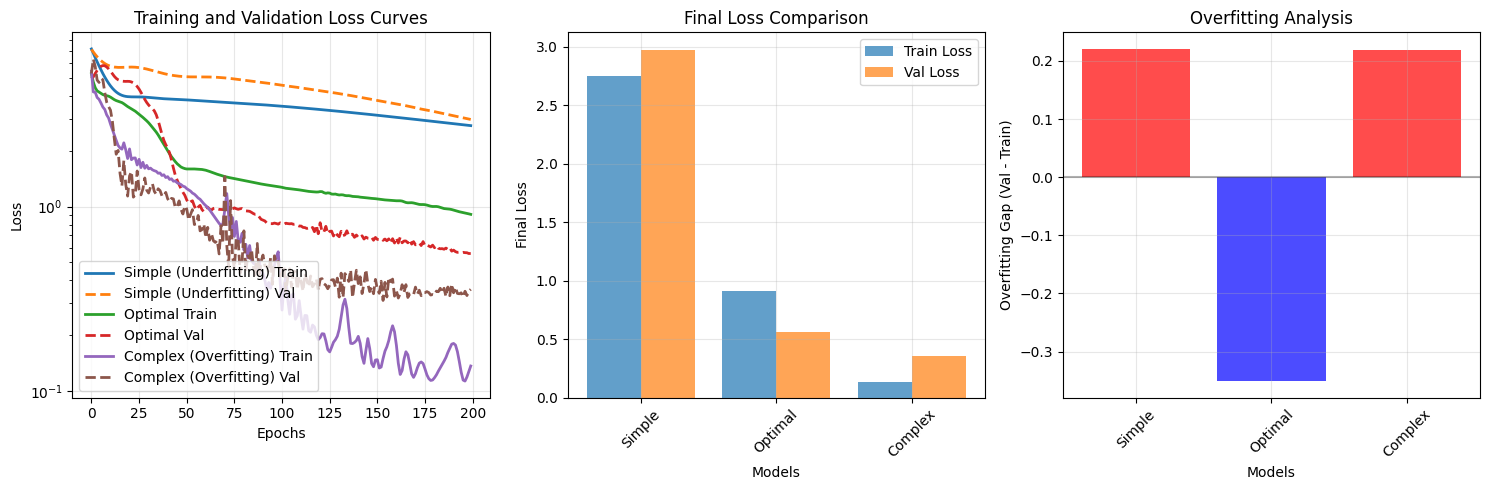

📈 TRAINING CURVE ANALYSIS:
🔍 Underfitting (Simple Model):
   • High training AND validation loss
   • Both curves plateau at high values
   • Model lacks capacity to learn patterns

🔍 Good Fit (Optimal Model):
   • Low training and validation loss
   • Small gap between train/val curves
   • Good generalization

🔍 Overfitting (Complex Model):
   • Very low training loss
   • Higher validation loss
   • Large gap indicates poor generalization


In [7]:
# Visualize the learning curves for all models
plt.figure(figsize=(15, 5))

# Plot 1: Training curves comparison
plt.subplot(1, 3, 1)
for name, history in training_histories.items():
    epochs = range(len(history['train_losses']))
    plt.plot(epochs, history['train_losses'], '-', label=f'{name} Train', linewidth=2)
    plt.plot(epochs, history['val_losses'], '--', label=f'{name} Val', linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 2: Final loss comparison
plt.subplot(1, 3, 2)
model_names = list(training_histories.keys())
train_final = [training_histories[name]['train_losses'][-1] for name in model_names]
val_final = [training_histories[name]['val_losses'][-1] for name in model_names]

x_pos = range(len(model_names))
plt.bar([x - 0.2 for x in x_pos], train_final, 0.4, label='Train Loss', alpha=0.7)
plt.bar([x + 0.2 for x in x_pos], val_final, 0.4, label='Val Loss', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Final Loss')
plt.title('Final Loss Comparison')
plt.xticks(x_pos, [name.split()[0] for name in model_names], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Overfitting gap
plt.subplot(1, 3, 3)
gaps = [val_final[i] - train_final[i] for i in range(len(model_names))]
colors = ['blue' if gap < 0.01 else 'orange' if gap < 0.05 else 'red' for gap in gaps]

plt.bar(x_pos, gaps, color=colors, alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Overfitting Gap (Val - Train)')
plt.title('Overfitting Analysis')
plt.xticks(x_pos, [name.split()[0] for name in model_names], rotation=45)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Show key insights about overfitting/underfitting
print("📈 TRAINING CURVE ANALYSIS:")
print("=" * 40)
print("🔍 Underfitting (Simple Model):")
print("   • High training AND validation loss")
print("   • Both curves plateau at high values")
print("   • Model lacks capacity to learn patterns")

print("\n🔍 Good Fit (Optimal Model):")
print("   • Low training and validation loss")
print("   • Small gap between train/val curves")
print("   • Good generalization")

print("\n🔍 Overfitting (Complex Model):")
print("   • Very low training loss")
print("   • Higher validation loss")
print("   • Large gap indicates poor generalization")

## 7. Compare Model Performance

Let's visualize how well each model learned to approximate the sine function by comparing their predictions against the true function.

Using device: cpu
Training models...
✅ All models trained!
✅ All models trained!


Using device: cpu
Training models...
✅ All models trained!
✅ All models trained!


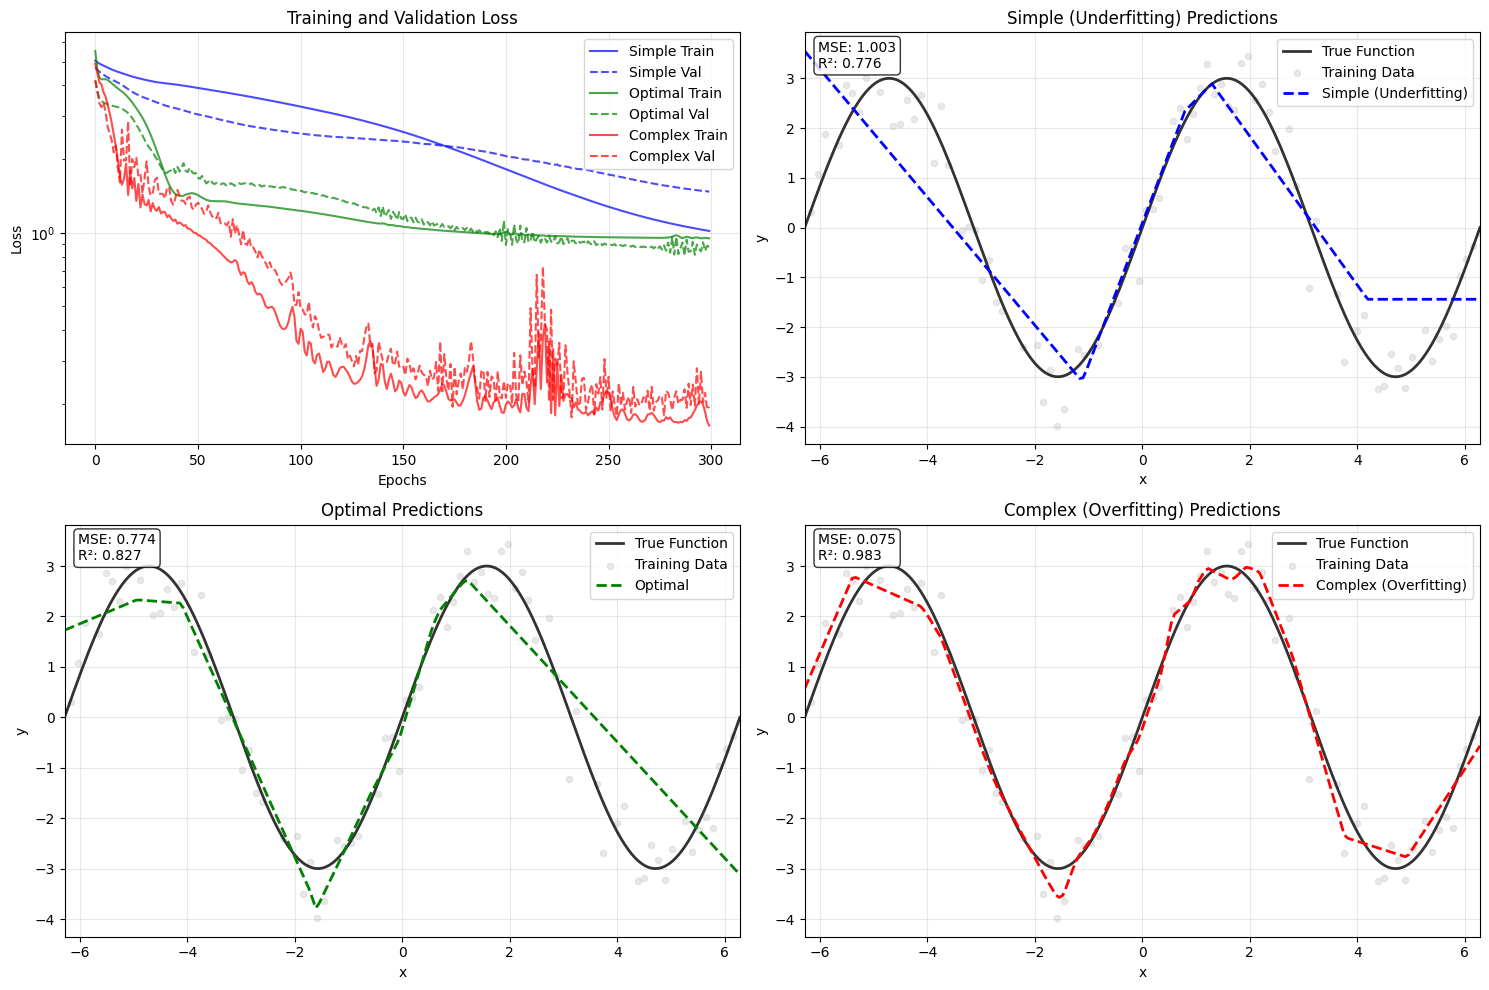


📊 MODEL PERFORMANCE SUMMARY:
Simple (Underfitting):
  MSE: 1.0029
  R²:  0.7760

Optimal:
  MSE: 0.7738
  R²:  0.8272

Complex (Overfitting):
  MSE: 0.0753
  R²:  0.9832

KEY INSIGHTS:
🔍 Simple Model: May underfit - cannot capture complexity
🔍 Optimal Model: Good balance between bias and variance
🔍 Complex Model: May overfit - high variance, memorizes noise


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Ensure we have consistent data
np.random.seed(42)
X_data = np.linspace(-2*np.pi, 2*np.pi, 100).reshape(-1, 1)
y_true_data = 3 * np.sin(X_data.flatten())
noise = np.random.normal(0, 0.5, size=y_true_data.shape)
y_data = y_true_data + noise

# Split data into train/validation
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Define simple neural network models
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

class OptimalNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

class ComplexNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

def train_simple_model(model, epochs=300):
    """Train a model and return training history"""
    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train).to(device)
    y_train_tensor = torch.FloatTensor(y_train.reshape(-1, 1)).to(device)
    X_val_tensor = torch.FloatTensor(X_val).to(device)
    y_val_tensor = torch.FloatTensor(y_val.reshape(-1, 1)).to(device)
    
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_pred = model(X_train_tensor)
        train_loss = criterion(train_pred, y_train_tensor)
        train_loss.backward()
        optimizer.step()
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val_tensor)
            val_loss = criterion(val_pred, y_val_tensor)
        
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())
    
    return model, train_losses, val_losses

# Train models
print("Training models...")
simple_model, simple_train_loss, simple_val_loss = train_simple_model(SimpleNet())
optimal_model, optimal_train_loss, optimal_val_loss = train_simple_model(OptimalNet())
complex_model, complex_train_loss, complex_val_loss = train_simple_model(ComplexNet())

print("✅ All models trained!")

# Evaluate models on test data
X_test = np.linspace(-2*np.pi, 2*np.pi, 200).reshape(-1, 1)
y_test_true = 3 * np.sin(X_test.flatten())

# Get predictions
models = {
    'Simple (Underfitting)': simple_model,
    'Optimal': optimal_model, 
    'Complex (Overfitting)': complex_model
}

predictions = {}
for name, model in models.items():
    model.eval()
    with torch.no_grad():
        X_test_tensor = torch.FloatTensor(X_test).to(device)
        pred = model(X_test_tensor).cpu().numpy().flatten()
        predictions[name] = pred

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(7, 5))

# Plot 1: Training curves
ax1 = axes[0, 0]
epochs = range(len(simple_train_loss))
ax1.plot(epochs, simple_train_loss, 'b-', label='Simple Train', alpha=0.7)
ax1.plot(epochs, simple_val_loss, 'b--', label='Simple Val', alpha=0.7)
ax1.plot(epochs, optimal_train_loss, 'g-', label='Optimal Train', alpha=0.7)
ax1.plot(epochs, optimal_val_loss, 'g--', label='Optimal Val', alpha=0.7)
ax1.plot(epochs, complex_train_loss, 'r-', label='Complex Train', alpha=0.7)
ax1.plot(epochs, complex_val_loss, 'r--', label='Complex Val', alpha=0.7)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# Plots 2-4: Model predictions
colors = ['blue', 'green', 'red']
for i, (name, pred) in enumerate(predictions.items()):
    ax = axes[0, 1] if i == 0 else axes[1, i-1]
    
    # Plot true function and data
    ax.plot(X_test, y_test_true, 'k-', linewidth=2, label='True Function', alpha=0.8)
    ax.scatter(X_train, y_train, alpha=0.5, s=20, color='lightgray', label='Training Data')
    
    # Plot prediction
    ax.plot(X_test, pred, color=colors[i], linewidth=2, linestyle='--', label=f'{name}')
    
    # Calculate and display MSE
    mse = np.mean((pred - y_test_true)**2)
    r2 = r2_score(y_test_true, pred)
    
    ax.text(0.02, 0.98, f'MSE: {mse:.3f}\nR²: {r2:.3f}', 
            transform=ax.transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
            fontsize=10, verticalalignment='top')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'{name} Predictions')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-2*np.pi, 2*np.pi)

plt.tight_layout()
plt.show()

# Performance summary
print("\n📊 MODEL PERFORMANCE SUMMARY:")
print("=" * 50)
for name, pred in predictions.items():
    mse = np.mean((pred - y_test_true)**2)
    r2 = r2_score(y_test_true, pred)
    final_train = models[name] 
    
    print(f"{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²:  {r2:.4f}")
    print()

print("KEY INSIGHTS:")
print("🔍 Simple Model: May underfit - cannot capture complexity")
print("🔍 Optimal Model: Good balance between bias and variance") 
print("🔍 Complex Model: May overfit - high variance, memorizes noise")

## 8. Interactive Model Explorer

Let's create an interactive tool to explore how different hyperparameters affect overfitting and underfitting in real-time.

In [9]:
# Import required libraries for interactive widgets
try:
    from ipywidgets import interact, widgets
    from IPython.display import display
    from sklearn.metrics import r2_score
    WIDGETS_AVAILABLE = True
except ImportError:
    print("⚠️ ipywidgets not available. Interactive features will be disabled.")
    try:
        from sklearn.metrics import r2_score
        WIDGETS_AVAILABLE = False
    except ImportError:
        print("⚠️ sklearn not available. Some features will be disabled.")
        def r2_score(y_true, y_pred):
            return 0.0  # Fallback function
        WIDGETS_AVAILABLE = False

def generate_sine_data(n_samples=200, noise_level=0.1, random_state=None):
    """Generate synthetic sine data for training"""
    if random_state is not None:
        np.random.seed(random_state)
    X = np.linspace(-2*np.pi, 2*np.pi, n_samples).reshape(-1, 1)
    y_true = 3 * np.sin(X.flatten())
    noise = np.random.normal(0, noise_level, size=y_true.shape)
    y = y_true + noise
    return X, y, y_true

class InteractiveModelExplorer:
    """Interactive tool for exploring model complexity and regularization"""
    
    def __init__(self):
        self.current_model = None
        self.training_history = None
    
    def create_and_train_model(self, hidden_size, num_layers, dropout_rate, l2_reg, 
                              learning_rate, epochs, dataset_size, noise_level):
        """Create and train a model with specified parameters"""
        
        # Generate dataset with specified parameters - use different random seed each time
        import time
        random_seed = int(time.time()) % 10000  # Different seed each time
        X_data, y_data, _ = generate_sine_data(
            n_samples=dataset_size, 
            noise_level=noise_level,
            random_state=random_seed
        )
        
        # Split data
        X_train_inter, X_val_inter, y_train_inter, y_val_inter = train_test_split(
            X_data, y_data, test_size=0.2, random_state=random_seed
        )
        
        # Create model architecture - FIX: Define class properly with parameters
        class DynamicNet(nn.Module):
            def __init__(self, input_size, hidden_size, output_size, num_layers, dropout_rate):
                super(DynamicNet, self).__init__()
                
                layers = []
                current_size = input_size
                
                # First layer
                layers.append(nn.Linear(current_size, hidden_size))
                layers.append(nn.ReLU())
                if dropout_rate > 0:
                    layers.append(nn.Dropout(dropout_rate))
                current_size = hidden_size
                
                # Hidden layers
                for _ in range(max(0, num_layers - 2)):  # Ensure we don't get negative layers
                    layers.append(nn.Linear(current_size, hidden_size))
                    layers.append(nn.ReLU())
                    if dropout_rate > 0:
                        layers.append(nn.Dropout(dropout_rate))
                
                # Output layer
                layers.append(nn.Linear(current_size, output_size))
                
                self.network = nn.Sequential(*layers)
            
            def forward(self, x):
                return self.network(x)
        
        # Create and train model - FIX: Pass parameters explicitly
        model = DynamicNet(
            input_size=1, 
            hidden_size=hidden_size, 
            output_size=1, 
            num_layers=num_layers, 
            dropout_rate=dropout_rate
        ).to(device)
        
        # Training setup
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_reg)
        
        # Convert to tensors - FIX: Proper tensor shapes
        X_train_tensor = torch.FloatTensor(X_train_inter).to(device)
        y_train_tensor = torch.FloatTensor(y_train_inter.reshape(-1, 1)).to(device)  # FIX: Reshape y
        X_val_tensor = torch.FloatTensor(X_val_inter).to(device)
        y_val_tensor = torch.FloatTensor(y_val_inter.reshape(-1, 1)).to(device)  # FIX: Reshape y
        
        # Training loop
        train_losses = []
        val_losses = []
        
        model.train()
        for epoch in range(epochs):
            # Training step
            optimizer.zero_grad()
            train_pred = model(X_train_tensor)
            train_loss = criterion(train_pred, y_train_tensor)
            train_loss.backward()
            optimizer.step()
            
            # Validation step
            model.eval()
            with torch.no_grad():
                val_pred = model(X_val_tensor)
                val_loss = criterion(val_pred, y_val_tensor)
            model.train()
            
            train_losses.append(train_loss.item())
            val_losses.append(val_loss.item())
        
        # Store results
        self.current_model = model
        self.training_history = {
            'train_losses': train_losses,
            'val_losses': val_losses,
            'X_train': X_train_inter,
            'y_train': y_train_inter,
            'X_val': X_val_inter,
            'y_val': y_val_inter
        }
        
        return model, train_losses, val_losses, X_train_inter, y_train_inter
    
    def plot_results(self, model, train_losses, val_losses, X_train_data, y_train_data):
        """Plot training curves and model predictions"""
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 5))
        
        # 1. Training curves
        epochs = range(1, len(train_losses) + 1)
        ax1.plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2)
        ax1.plot(epochs, val_losses, 'r--', label='Validation Loss', linewidth=2)
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss (MSE)')
        ax1.set_title('Training and Validation Loss')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.set_yscale('log')
        
        # Add overfitting detection
        final_train_loss = train_losses[-1]
        final_val_loss = val_losses[-1]
        overfitting_gap = final_val_loss - final_train_loss
        
        if overfitting_gap > 0.05:
            ax1.text(0.6, 0.9, '⚠️ OVERFITTING', transform=ax1.transAxes,
                    bbox=dict(boxstyle='round', facecolor='red', alpha=0.3),
                    fontsize=12, fontweight='bold')
        elif final_train_loss > 0.1:
            ax1.text(0.6, 0.9, '⚠️ UNDERFITTING', transform=ax1.transAxes,
                    bbox=dict(boxstyle='round', facecolor='orange', alpha=0.3),
                    fontsize=12, fontweight='bold')
        else:
            ax1.text(0.6, 0.9, '✅ GOOD FIT', transform=ax1.transAxes,
                    bbox=dict(boxstyle='round', facecolor='green', alpha=0.3),
                    fontsize=12, fontweight='bold')
        
        # 2. Model predictions
        X_test_range = np.linspace(-2*np.pi, 2*np.pi, 200).reshape(-1, 1)
        y_test_true = 3 * np.sin(X_test_range.flatten())
        
        model.eval()
        with torch.no_grad():
            X_test_tensor = torch.FloatTensor(X_test_range).to(device)
            y_pred = model(X_test_tensor).cpu().numpy().flatten()  # FIX: Flatten for plotting
        
        ax2.scatter(X_train_data, y_train_data, alpha=0.6, s=30, 
                   color='lightblue', label='Training Data')
        ax2.plot(X_test_range, y_test_true, 'k-', linewidth=3, 
                label='True Function', alpha=0.8)
        ax2.plot(X_test_range, y_pred, 'r--', linewidth=2, 
                label='Model Prediction')
        
        ax2.set_xlabel('x')
        ax2.set_ylabel('y')
        ax2.set_title('Model Prediction vs True Function')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.set_xlim(-2*np.pi, 2*np.pi)
        ax2.set_ylim(-6, 6)
        
        # 3. Loss evolution details
        if len(epochs) > 50:
            ax3.plot(epochs[-50:], train_losses[-50:], 'b-', 
                    label='Training Loss (last 50 epochs)', linewidth=2)
            ax3.plot(epochs[-50:], val_losses[-50:], 'r--', 
                    label='Validation Loss (last 50 epochs)', linewidth=2)
        else:
            ax3.plot(epochs, train_losses, 'b-', 
                    label='Training Loss', linewidth=2)
            ax3.plot(epochs, val_losses, 'r--', 
                    label='Validation Loss', linewidth=2)
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('Loss (MSE)')
        ax3.set_title('Loss Evolution (Final Epochs)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. Performance metrics
        mse_test = np.mean((y_pred - y_test_true)**2)
        r2_test = r2_score(y_test_true, y_pred)
        
        metrics_text = f"""
        Performance Metrics:
        
        Final Training Loss: {final_train_loss:.6f}
        Final Validation Loss: {final_val_loss:.6f}
        Overfitting Gap: {overfitting_gap:.6f}
        
        Test MSE: {mse_test:.6f}
        Test R²: {r2_test:.4f}
        
        Model Parameters: {sum(p.numel() for p in model.parameters()):,}
        """
        
        ax4.text(0.1, 0.9, metrics_text, transform=ax4.transAxes,
                fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
        ax4.set_xlim(0, 1)
        ax4.set_ylim(0, 1)
        ax4.axis('off')
        ax4.set_title('Performance Summary')
        
        plt.tight_layout()
        plt.show()
        
        return {
            'final_train_loss': final_train_loss,
            'final_val_loss': final_val_loss,
            'overfitting_gap': overfitting_gap,
            'test_mse': mse_test,
            'test_r2': r2_test
        }

# Create explorer instance
explorer = InteractiveModelExplorer()

def interactive_model_training(hidden_size=50, num_layers=2, dropout_rate=0.0, 
                             l2_reg=0.0001, learning_rate=0.01, epochs=200,
                             dataset_size=200, noise_level=0.1):
    """Interactive function for model training and visualization"""
    
    print(f"🔄 Training model with parameters:")
    print(f"   Hidden Size: {hidden_size}")
    print(f"   Layers: {num_layers}")
    print(f"   Dropout: {dropout_rate}")
    print(f"   L2 Regularization: {l2_reg}")
    print(f"   Learning Rate: {learning_rate}")
    print(f"   Epochs: {epochs}")
    print(f"   Dataset Size: {dataset_size}")
    print(f"   Noise Level: {noise_level}")
    print()
    
    # Train model
    model, train_losses, val_losses, X_train_data, y_train_data = explorer.create_and_train_model(
        hidden_size, num_layers, dropout_rate, l2_reg, learning_rate, epochs, dataset_size, noise_level
    )
    
    # Plot results
    metrics = explorer.plot_results(model, train_losses, val_losses, X_train_data, y_train_data)
    
    # Interpretation
    print("INTERPRETATION:")
    print("=" * 40)
    
    if metrics['overfitting_gap'] > 0.05:
        print("🚨 OVERFITTING DETECTED!")
        print("   Try: Reduce model complexity, increase dropout, add L2 regularization")
    elif metrics['final_train_loss'] > 0.1:
        print("🚨 UNDERFITTING DETECTED!")
        print("   Try: Increase model complexity, reduce regularization, train longer")
    else:
        print("✅ GOOD BALANCE!")
        print("   Model shows good generalization capability")
    
    return metrics

print("🎮 INTERACTIVE MODEL EXPLORER")
print("=" * 50)
print("Experiment with different parameters to see their effects on overfitting and underfitting!")
print()

# Create interactive widget only if widgets are available
if WIDGETS_AVAILABLE:
    try:
        interact(interactive_model_training,
                 hidden_size=widgets.IntSlider(value=50, min=5, max=200, step=5, 
                                              description='Hidden Size:'),
                 num_layers=widgets.IntSlider(value=2, min=1, max=6, step=1, 
                                             description='# Layers:'),
                 dropout_rate=widgets.FloatSlider(value=0.0, min=0.0, max=0.8, step=0.01, 
                                                 description='Dropout Rate:'),
                 l2_reg=widgets.FloatLogSlider(value=0.0001, base=10, min=-6, max=-1, step=1, 
                                              description='L2 Reg:'),
                 learning_rate=widgets.FloatLogSlider(value=0.01, base=10, min=-6, max=-1, step=1, 
                                                    description='Learning Rate:'),
                 epochs=widgets.IntSlider(value=200, min=50, max=2000, step=100, 
                                         description='Epochs:'),
                 dataset_size=widgets.IntSlider(value=200, min=50, max=1000, step=50, 
                                               description='Dataset Size:'),
                 noise_level=widgets.FloatSlider(value=0.1, min=0.0, max=2.0, step=0.05, 
                                                description='Noise Level:'))
    except Exception as e:
        print(f"❌ Error creating interactive widget: {e}")
        print("📝 You can still run the function manually:")
        print("interactive_model_training(hidden_size=50, num_layers=2, dropout_rate=0.2)")
else:
    print("📝 To use interactive features, install ipywidgets:")
    print("   pip install ipywidgets")
    print("   jupyter nbextension enable --py widgetsnbextension")
    print()
    print("📝 You can still run the function manually:")
    print("interactive_model_training(hidden_size=50, num_layers=2, dropout_rate=0.2)")

🎮 INTERACTIVE MODEL EXPLORER
Experiment with different parameters to see their effects on overfitting and underfitting!



🎮 INTERACTIVE MODEL EXPLORER
Experiment with different parameters to see their effects on overfitting and underfitting!



interactive(children=(IntSlider(value=50, description='Hidden Size:', max=200, min=5, step=5), IntSlider(value…

## 9. 🎯 Design Recipe: First Overfit, Then Reduce Overfitting

### **The Golden Rule of Deep Learning Model Development**

> **"First get a model that can overfit, then reduce overfitting"**
> 
> *This approach ensures your model has sufficient capacity to learn before you constrain it.*

### **Why This Recipe Works:**

1. **🎯 Capacity Verification**: If your model can't overfit, it lacks the capacity to learn the underlying patterns
2. **🔧 Systematic Approach**: Start with maximum learning potential, then systematically constrain
3. **🚀 Faster Development**: Avoids the trap of underparameterized models that will never work
4. **📊 Clear Diagnostics**: Makes it obvious whether you have a capacity or generalization problem

### **The Step-by-Step Process:**

#### **Phase 1: Build an Overfitting Model**
- Use a complex architecture with many parameters
- No regularization initially  
- Train until you see clear overfitting
- This proves your model CAN learn the patterns

#### **Phase 2: Systematically Reduce Overfitting**
- Add regularization techniques one by one
- Monitor the training/validation gap
- Find the sweet spot between capacity and generalization

---

Let's demonstrate this recipe in action! 👇

In [ ]:
print("🎯 DESIGN RECIPE DEMONSTRATION")
print("=" * 60)
print("Following the golden rule: 'First get a model that can overfit, then reduce overfitting'")
print()

# Generate training data (intentionally small to make overfitting easier)
np.random.seed(42)
X_recipe = np.linspace(-2*np.pi, 2*np.pi, 50).reshape(-1, 1)  # Small dataset
y_true_recipe = 3 * np.sin(X_recipe.flatten())
noise_recipe = np.random.normal(0, 0.3, size=y_true_recipe.shape)
y_recipe = y_true_recipe + noise_recipe

# Split into train/val (intentionally small)
X_train_recipe, X_val_recipe, y_train_recipe, y_val_recipe = train_test_split(
    X_recipe, y_recipe, test_size=0.3, random_state=42
)

print(f"📊 DATASET FOR RECIPE:")
print(f"   Training samples: {len(X_train_recipe)}")
print(f"   Validation samples: {len(X_val_recipe)}")
print("   Small dataset → Perfect for demonstrating overfitting")
print()

# PHASE 1: Build a model that CAN overfit
print("🚀 PHASE 1: BUILD AN OVERFITTING MODEL")
print("=" * 50)
print("Goal: Create a model with enough capacity to memorize the training data")
print()

class OverfittingCapableNet(nn.Module):
    """Intentionally over-parameterized network to demonstrate overfitting"""
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 256),      # Large hidden layers
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Train the overfitting model
overfitting_capable = OverfittingCapableNet().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(overfitting_capable.parameters(), lr=0.001)  # Standard learning rate

# Convert to tensors
X_train_tensor = torch.FloatTensor(X_train_recipe).to(device)
y_train_tensor = torch.FloatTensor(y_train_recipe.reshape(-1, 1)).to(device)
X_val_tensor = torch.FloatTensor(X_val_recipe).to(device)
y_val_tensor = torch.FloatTensor(y_val_recipe.reshape(-1, 1)).to(device)

# Training loop - track losses
train_losses_phase1 = []
val_losses_phase1 = []

print("Training overfitting-capable model...")
for epoch in range(1000):  # Train for many epochs
    # Training
    overfitting_capable.train()
    optimizer.zero_grad()
    train_pred = overfitting_capable(X_train_tensor)
    train_loss = criterion(train_pred, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    
    # Validation
    overfitting_capable.eval()
    with torch.no_grad():
        val_pred = overfitting_capable(X_val_tensor)
        val_loss = criterion(val_pred, y_val_tensor)
    
    train_losses_phase1.append(train_loss.item())
    val_losses_phase1.append(val_loss.item())
    
    if (epoch + 1) % 200 == 0:
        gap = val_loss.item() - train_loss.item()
        print(f"   Epoch {epoch+1}: Train={train_loss.item():.6f}, Val={val_loss.item():.6f}, Gap={gap:.6f}")

# Check if we achieved overfitting
final_train_loss = train_losses_phase1[-1]
final_val_loss = val_losses_phase1[-1]
overfitting_gap = final_val_loss - final_train_loss

print(f"\n✅ PHASE 1 RESULTS:")
print(f"   Final Train Loss: {final_train_loss:.6f}")
print(f"   Final Val Loss: {final_val_loss:.6f}")
print(f"   Overfitting Gap: {overfitting_gap:.6f}")

if overfitting_gap > 0.01:
    print("   ✅ SUCCESS: Model can overfit! (Large gap between train/val)")
    print("   📋 This proves the model has sufficient capacity to learn")
else:
    print("   ⚠️ WARNING: Model might not be overfitting enough")
    print("   📋 Consider: More parameters, longer training, or smaller dataset")

print(f"\n📈 Model Parameters: {sum(p.numel() for p in overfitting_capable.parameters()):,}")
print("🎯 Next: Apply regularization to reduce overfitting while maintaining performance")

In [ ]:
print("\n🔧 PHASE 2: SYSTEMATICALLY REDUCE OVERFITTING")
print("=" * 50)
print("Goal: Apply regularization techniques one by one to find the optimal balance")
print()

# Strategy: Test different regularization approaches
regularization_strategies = {
    "No Regularization": {"dropout": 0.0, "weight_decay": 0.0, "early_stop": False},
    "Light Dropout": {"dropout": 0.2, "weight_decay": 0.0, "early_stop": False},
    "Heavy Dropout": {"dropout": 0.5, "weight_decay": 0.0, "early_stop": False},
    "L2 Regularization": {"dropout": 0.0, "weight_decay": 0.01, "early_stop": False},
    "Combined (Dropout + L2)": {"dropout": 0.3, "weight_decay": 0.001, "early_stop": False},
    "Early Stopping": {"dropout": 0.0, "weight_decay": 0.0, "early_stop": True}
}

class RegularizedNet(nn.Module):
    """Network with configurable regularization"""
    def __init__(self, dropout_rate=0.0):
        super().__init__()
        # Same architecture as overfitting model, but with dropout
        self.layers = nn.Sequential(
            nn.Linear(1, 256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

def train_with_regularization(dropout_rate, weight_decay, early_stop, max_epochs=800):
    """Train model with specified regularization parameters"""
    model = RegularizedNet(dropout_rate).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)
    
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
    patience = 50  # For early stopping
    
    for epoch in range(max_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_pred = model(X_train_tensor)
        train_loss = criterion(train_pred, y_train_tensor)
        train_loss.backward()
        optimizer.step()
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val_tensor)
            val_loss = criterion(val_pred, y_val_tensor)
        
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())
        
        # Early stopping check
        if early_stop:
            if val_loss.item() < best_val_loss:
                best_val_loss = val_loss.item()
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"      Early stopping at epoch {epoch+1}")
                    break
    
    return model, train_losses, val_losses

# Test each regularization strategy
results = {}
print("Testing different regularization strategies...")
print()

for strategy_name, params in regularization_strategies.items():
    print(f"🔄 Testing: {strategy_name}")
    
    model, train_losses, val_losses = train_with_regularization(
        dropout_rate=params["dropout"],
        weight_decay=params["weight_decay"],
        early_stop=params["early_stop"]
    )
    
    # Calculate final metrics
    final_train = train_losses[-1]
    final_val = val_losses[-1]
    gap = final_val - final_train
    epochs_trained = len(train_losses)
    
    results[strategy_name] = {
        "model": model,
        "train_losses": train_losses,
        "val_losses": val_losses,
        "final_train_loss": final_train,
        "final_val_loss": final_val,
        "overfitting_gap": gap,
        "epochs_trained": epochs_trained
    }
    
    print(f"   Train: {final_train:.4f}, Val: {final_val:.4f}, Gap: {gap:.4f}, Epochs: {epochs_trained}")

print("\n📊 REGULARIZATION RESULTS SUMMARY:")
print("=" * 60)
print(f"{'Strategy':<25} {'Train Loss':<12} {'Val Loss':<10} {'Gap':<8} {'Epochs':<8}")
print("-" * 60)

for name, result in results.items():
    print(f"{name:<25} {result['final_train_loss']:<12.4f} {result['final_val_loss']:<10.4f} "
          f"{result['overfitting_gap']:<8.4f} {result['epochs_trained']:<8}")

# Find the best strategy (lowest validation loss with reasonable gap)
best_strategy = min(results.keys(), 
                   key=lambda x: results[x]['final_val_loss'] + 0.1 * max(0, results[x]['overfitting_gap']))

print(f"\n🏆 RECOMMENDED STRATEGY: {best_strategy}")
best_result = results[best_strategy]
print(f"   ✅ Val Loss: {best_result['final_val_loss']:.4f}")
print(f"   ✅ Overfitting Gap: {best_result['overfitting_gap']:.4f}")
print(f"   ✅ Good balance between performance and generalization")

print(f"\n💡 KEY INSIGHT:")
print(f"   Started with overfitting gap of {overfitting_gap:.4f}")
print(f"   Reduced to {best_result['overfitting_gap']:.4f} with {best_strategy}")
print(f"   Improvement: {((overfitting_gap - best_result['overfitting_gap']) / overfitting_gap * 100):.1f}% reduction in overfitting")

In [ ]:
# Visualize the design recipe results
plt.figure(figsize=(18, 12))

# Plot 1: Training curves comparison
plt.subplot(2, 3, 1)
# First show the original overfitting model
epochs_phase1 = range(len(train_losses_phase1))
plt.plot(epochs_phase1, train_losses_phase1, 'r-', alpha=0.7, linewidth=2, label='Phase 1: Overfitting Model (Train)')
plt.plot(epochs_phase1, val_losses_phase1, 'r--', alpha=0.7, linewidth=2, label='Phase 1: Overfitting Model (Val)')

# Show the best regularized model
best_train = results[best_strategy]['train_losses']
best_val = results[best_strategy]['val_losses']
epochs_best = range(len(best_train))
plt.plot(epochs_best, best_train, 'g-', alpha=0.8, linewidth=2, label=f'Phase 2: {best_strategy} (Train)')
plt.plot(epochs_best, best_val, 'g--', alpha=0.8, linewidth=2, label=f'Phase 2: {best_strategy} (Val)')

plt.xlabel('Epochs')
plt.ylabel('Loss (log scale)')
plt.title('Design Recipe: Before vs After Regularization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 2: Overfitting gap comparison
plt.subplot(2, 3, 2)
strategies = list(results.keys())
gaps = [results[strategy]['overfitting_gap'] for strategy in strategies]
colors = ['red' if gap > 0.05 else 'orange' if gap > 0.02 else 'green' for gap in gaps]

bars = plt.bar(range(len(strategies)), gaps, color=colors, alpha=0.7)
plt.xlabel('Regularization Strategy')
plt.ylabel('Overfitting Gap (Val - Train)')
plt.title('Overfitting Gap by Strategy')
plt.xticks(range(len(strategies)), [s.replace(' ', '\n') for s in strategies], rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.02, color='orange', linestyle='--', alpha=0.5, label='Good Gap Threshold')
plt.legend()

# Plot 3: Validation loss comparison
plt.subplot(2, 3, 3)
val_losses_final = [results[strategy]['final_val_loss'] for strategy in strategies]
colors_val = ['green' if loss == min(val_losses_final) else 'lightblue' for loss in val_losses_final]

bars = plt.bar(range(len(strategies)), val_losses_final, color=colors_val, alpha=0.7)
plt.xlabel('Regularization Strategy')
plt.ylabel('Final Validation Loss')
plt.title('Validation Performance by Strategy')
plt.xticks(range(len(strategies)), [s.replace(' ', '\n') for s in strategies], rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Plot 4: Model predictions comparison
plt.subplot(2, 3, 4)
X_test_recipe = np.linspace(-2*np.pi, 2*np.pi, 200).reshape(-1, 1)
y_test_true_recipe = 3 * np.sin(X_test_recipe.flatten())

# Original overfitting model prediction
overfitting_capable.eval()
with torch.no_grad():
    X_test_tensor = torch.FloatTensor(X_test_recipe).to(device)
    y_pred_overfitting = overfitting_capable(X_test_tensor).cpu().numpy().flatten()

# Best regularized model prediction
best_model = results[best_strategy]['model']
best_model.eval()
with torch.no_grad():
    y_pred_best = best_model(X_test_tensor).cpu().numpy().flatten()

plt.plot(X_test_recipe, y_test_true_recipe, 'k-', linewidth=3, label='True Function', alpha=0.8)
plt.scatter(X_train_recipe, y_train_recipe, alpha=0.7, s=60, color='blue', label='Training Data', zorder=5)
plt.plot(X_test_recipe, y_pred_overfitting, 'r--', linewidth=2, alpha=0.7, label='Phase 1: Overfitting')
plt.plot(X_test_recipe, y_pred_best, 'g--', linewidth=2, alpha=0.8, label=f'Phase 2: {best_strategy}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions: Before vs After Regularization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-2*np.pi, 2*np.pi)

# Plot 5: Design recipe process flow
plt.subplot(2, 3, 5)
plt.text(0.5, 0.9, '🎯 DESIGN RECIPE PROCESS', ha='center', va='center', 
         fontsize=16, fontweight='bold', transform=plt.gca().transAxes)

process_steps = [
    "1. 🚀 Build Overfitting Model",
    "   • Large architecture",
    "   • No regularization", 
    "   • Train until overfitting",
    "",
    "2. ✅ Verify Overfitting",
    "   • Large train/val gap",
    "   • Proves sufficient capacity",
    "",
    "3. 🔧 Apply Regularization",
    "   • Test different techniques",
    "   • Monitor train/val gap",
    "   • Find optimal balance",
    "",
    "4. 🏆 Select Best Model",
    f"   • Chosen: {best_strategy}",
    f"   • Gap reduced by {((overfitting_gap - best_result['overfitting_gap']) / overfitting_gap * 100):.1f}%"
]

y_pos = 0.75
for step in process_steps:
    if step.startswith(("1.", "2.", "3.", "4.")):
        plt.text(0.1, y_pos, step, ha='left', va='center', fontsize=12, fontweight='bold',
                color='darkblue', transform=plt.gca().transAxes)
    elif step.startswith("   •"):
        plt.text(0.15, y_pos, step, ha='left', va='center', fontsize=10,
                color='darkgreen', transform=plt.gca().transAxes)
    else:
        plt.text(0.15, y_pos, step, ha='left', va='center', fontsize=10,
                transform=plt.gca().transAxes)
    y_pos -= 0.05

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

# Plot 6: Success metrics
plt.subplot(2, 3, 6)
metrics_data = {
    'Original\nOverfitting': [overfitting_gap, final_val_loss],
    f'Best Strategy\n({best_strategy})': [best_result['overfitting_gap'], best_result['final_val_loss']]
}

x_pos = np.arange(len(metrics_data))
width = 0.35

overfitting_gaps = [metrics_data[key][0] for key in metrics_data.keys()]
val_losses = [metrics_data[key][1] for key in metrics_data.keys()]

bars1 = plt.bar(x_pos - width/2, overfitting_gaps, width, label='Overfitting Gap', alpha=0.7, color='orange')
bars2 = plt.bar(x_pos + width/2, val_losses, width, label='Validation Loss', alpha=0.7, color='lightblue')

plt.xlabel('Model Version')
plt.ylabel('Loss Value')
plt.title('Recipe Success: Before vs After')
plt.xticks(x_pos, metrics_data.keys())
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n🎯 DESIGN RECIPE SUMMARY")
print("=" * 50)
print("✅ PHASE 1 SUCCESS: Built a model that can overfit")
print(f"   • Overfitting gap: {overfitting_gap:.4f}")
print("   • This proves the model has sufficient learning capacity")
print()
print("✅ PHASE 2 SUCCESS: Systematically reduced overfitting")
print(f"   • Best strategy: {best_strategy}")
print(f"   • New overfitting gap: {best_result['overfitting_gap']:.4f}")
print(f"   • Improvement: {((overfitting_gap - best_result['overfitting_gap']) / overfitting_gap * 100):.1f}% reduction")
print()
print("🏆 FINAL RESULT: Well-generalized model with good performance!")
print(f"   • Maintained learning capacity while improving generalization")
print(f"   • Clear systematic approach avoids guesswork")

### 🛠️ Practical Guidelines for Applying the Design Recipe

#### **Phase 1 Checklist: Building an Overfitting Model**

✅ **Model Architecture:**
- Start with more layers/neurons than you think you need
- Use standard activations (ReLU, etc.)
- No regularization initially (no dropout, weight decay, batch norm)

✅ **Training Setup:**
- Use a reasonable learning rate (0.001-0.01)
- Train for many epochs (until clear overfitting appears)
- Monitor both training and validation loss

✅ **Success Criteria:**
- Training loss much lower than validation loss
- Clear divergence between train/val curves
- Gap > 0.02-0.05 depending on problem complexity

❌ **Common Mistakes:**
- Starting with regularization too early
- Using too small architectures
- Stopping training before overfitting appears

---

#### **Phase 2 Checklist: Reducing Overfitting Systematically**

✅ **Regularization Techniques to Try (in order):**
1. **Dropout** (0.1 → 0.3 → 0.5): Simple and effective
2. **L2 Regularization** (1e-4 → 1e-3 → 1e-2): Penalizes large weights
3. **Early Stopping**: Stop when validation loss stops improving
4. **Batch Normalization**: Stabilizes training
5. **Data Augmentation**: If applicable to your domain

✅ **Systematic Testing:**
- Try one technique at a time
- Start with mild regularization, increase gradually
- Keep track of train/val gap for each experiment
- Test combinations of successful techniques

✅ **Success Criteria:**
- Validation loss improves
- Train/val gap reduces to reasonable level (< 0.02-0.05)
- Model still learns (training loss decreases)

❌ **Common Mistakes:**
- Applying too much regularization at once
- Not testing techniques systematically
- Focusing only on training loss
- Giving up too early

---

#### **🎯 When to Use This Recipe:**

**✅ Perfect for:**
- New deep learning projects
- Complex architectures (CNNs, RNNs, Transformers)
- Limited training data scenarios
- Industrial applications where reliability is crucial

**⚠️ Consider alternatives for:**
- Very simple problems (linear regression, etc.)
- When you have infinite data
- Extremely time-sensitive applications

---

#### **🏭 Industrial Control Applications:**

**Process Control:**
- Phase 1: Complex LSTM with many layers for sensor fusion
- Phase 2: Add dropout to prevent memorizing sensor noise

**Predictive Maintenance:**
- Phase 1: Deep CNN for vibration pattern recognition  
- Phase 2: Early stopping to prevent overfitting to specific machines

**Quality Control:**
- Phase 1: Large neural network for defect detection
- Phase 2: L2 regularization to ensure generalization across product batches

---

**💡 Remember: This recipe ensures you never waste time with underpowered models. If your model can't overfit, it definitely can't generalize!**

## 🎯 Key Takeaways and Best Practices

### **🏆 THE GOLDEN RULE: Design Recipe for Deep Learning**

> **"First get a model that can overfit, then reduce overfitting"**

This fundamental principle ensures:
- ✅ Your model has sufficient capacity to learn
- ✅ You focus on the right problem (generalization vs capacity)
- ✅ Systematic approach leads to better results
- ✅ Clear diagnostics guide your decisions

---

### **Understanding Overfitting and Underfitting:**

#### **🔴 UNDERFITTING (High Bias, Low Variance):**
- **Symptoms**: High training and validation loss, both curves plateau at high values
- **Causes**: Model too simple, insufficient training, high regularization
- **Solutions**: 
  - Increase model complexity (more layers/neurons)
  - Reduce regularization strength
  - Train for more epochs
  - Use more sophisticated architectures

#### **🔴 OVERFITTING (Low Bias, High Variance):**
- **Symptoms**: Low training loss, high validation loss, large gap between them
- **Causes**: Model too complex, insufficient data, no regularization
- **Solutions**:
  - Add dropout layers
  - Apply L1/L2 regularization
  - Use early stopping
  - Collect more training data
  - Reduce model complexity

#### **🟢 GOOD FIT (Balanced Bias-Variance):**
- **Symptoms**: Both losses converge to low values, small gap between them
- **Characteristics**: Model generalizes well to unseen data

### **Regularization Techniques Summary:**

| **Technique** | **How it Works** | **When to Use** | **PyTorch Implementation** |
|---------------|------------------|-----------------|---------------------------|
| **Dropout** | Randomly sets neurons to zero during training | High variance, complex models | `nn.Dropout(p=0.3)` |
| **L2 Regularization** | Penalizes large weights | Prevent weight explosion | `weight_decay` in optimizer |
| **L1 Regularization** | Promotes sparse weights | Feature selection needed | Custom loss term |
| **Early Stopping** | Stops training when validation loss increases | Prevent overtraining | Monitor validation loss |
| **Batch Normalization** | Normalizes layer inputs | Stabilize training | `nn.BatchNorm1d()` |

### **Model Development Workflow:**

1. **🚀 Phase 1: Build Overfitting Capability**
   - Create complex architecture
   - No regularization initially
   - Train until clear overfitting
   - Verify sufficient capacity

2. **🔧 Phase 2: Systematic Regularization**
   - Apply techniques one by one
   - Monitor train/validation gap
   - Find optimal balance
   - Test combinations

3. **✅ Validation and Selection**
   - Choose based on validation performance
   - Consider train/val gap
   - Test on hold-out set

### **Industrial Applications:**

This knowledge is crucial for:
- **Process Control**: Models that predict equipment behavior
- **Quality Prediction**: Ensuring models generalize to new production batches  
- **Predictive Maintenance**: Balancing sensitivity and false alarms
- **Optimization**: Models that work across different operating conditions

### **Experiment Suggestions:**

Try the interactive explorer with these scenarios:
1. **Small dataset (50 samples) + Complex model** → Observe overfitting
2. **Large dataset (1000 samples) + Simple model** → Observe underfitting  
3. **Medium dataset + High dropout (0.7)** → See regularization effect
4. **High noise (0.4) + Various complexities** → Study noise robustness

---

**This tutorial demonstrates the fundamental trade-offs in machine learning and provides a systematic approach (the design recipe) to build well-generalized models for industrial applications. The sine function y = 3*sin(x) provides a clear demonstration of overfitting and underfitting concepts while the design recipe ensures you always start with sufficient model capacity.**